In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [11]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Encode labels: ham = 0, spam = 1
data['label_num'] = data.label.map({'human':0, 'spam':1})

# Split into train/test
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)


In [3]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_data['message'])
X_test = vectorizer.transform(test_data['message'])

y_train = train_data['label_num']
y_test = test_data['label_num']


In [4]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
y_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.9748878923766816


In [9]:
def predict_message(message):
    msg_vector = vectorizer.transform([message])
    prob = model.predict_proba(msg_vector)[0][1]  # probability of spam
    label = "spam" if prob >= 0.5 else "human"
    return [prob, label]


In [10]:
print(predict_message("Hey! Are we still meeting today?"))  # likely human
print(predict_message("Congratulations! You won a free iPhone!"))  # likely spam


[np.float64(0.022382088537194044), 'human']
[np.float64(0.5252508791681261), 'spam']


Dataset preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Test Accuracy: 97.49%


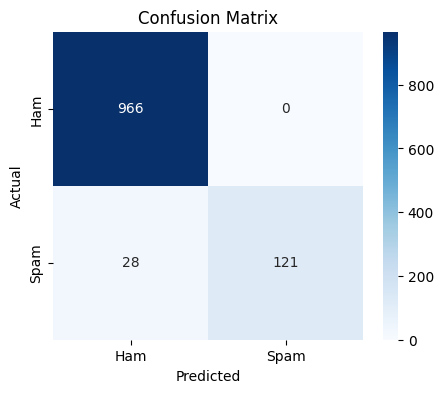


Predictions on example messages:
Message: Hey! Are we still meeting today?
Prediction: [np.float64(0.022382088537194044), 'ham']

Message: Congratulations! You won a free iPhone! Click here to claim.
Prediction: [np.float64(0.6571830178018687), 'spam']

Message: Can you call me back when you're free?
Prediction: [np.float64(0.09424932182598926), 'ham']

Message: URGENT! You have won a $1000 Walmart gift card. Reply now!
Prediction: [np.float64(0.6265081623730118), 'spam']



In [12]:

# SMS Spam Classification Project

# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

# Show first 5 rows
print("Dataset preview:")
print(data.head())

# Step 3: Encode Labels
# ham = 0, spam = 1
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Step 4: Train/Test Split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_data['message']
y_train = train_data['label_num']
X_test = test_data['message']
y_test = test_data['label_num']

# Step 5: Vectorize Text Data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Step 6: Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train_vect, y_train)

# Step 7: Evaluate Model
y_pred = model.predict(X_test_vect)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")

# Optional: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 8: Create Predict Function
def predict_message(message):
    """
    Predicts if an SMS message is 'ham' or 'spam'.

    Parameters:
    message (str): Input message text

    Returns:
    list: [probability_of_spam (0-1), 'ham' or 'spam']
    """
    msg_vect = vectorizer.transform([message])
    spam_prob = model.predict_proba(msg_vect)[0][1]  # Probability of spam
    label = "spam" if spam_prob >= 0.5 else "ham"
    return [spam_prob, label]

# Step 9: Test the Predict Function
examples = [
    "Hey! Are we still meeting today?",
    "Congratulations! You won a free iPhone! Click here to claim.",
    "Can you call me back when you're free?",
    "URGENT! You have won a $1000 Walmart gift card. Reply now!"
]

print("\nPredictions on example messages:")
for msg in examples:
    result = predict_message(msg)
    print(f"Message: {msg}\nPrediction: {result}\n")
